In [6]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import BayesianRidge



In [2]:
df=sns.load_dataset('mpg')

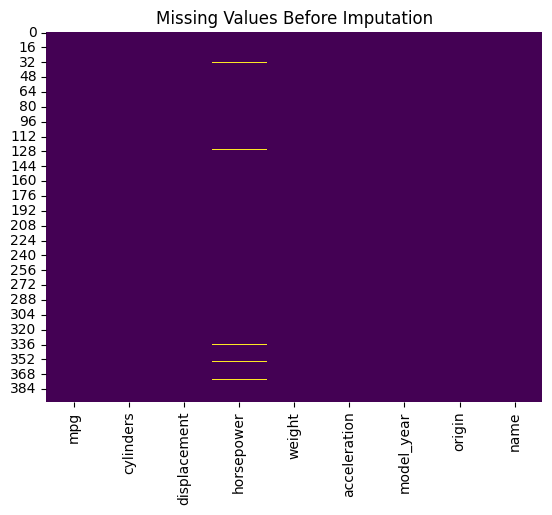

In [3]:

sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title("Missing Values Before Imputation")
plt.show()

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model_year    398 non-null    int64  
 7   origin        398 non-null    object 
 8   name          398 non-null    object 
dtypes: float64(4), int64(3), object(2)
memory usage: 28.1+ KB


In [4]:
df.isnull().sum()

,0
mpg,0
cylinders,0
displacement,0
horsepower,6
weight,0
acceleration,0
model_year,0
origin,0
name,0


In [8]:
le=LabelEncoder()
df['origin']=le.fit_transform(df['origin'])
df['name']=le.fit_transform(df['name'])

In [9]:
df

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,2,49
1,15.0,8,350.0,165.0,3693,11.5,70,2,36
2,18.0,8,318.0,150.0,3436,11.0,70,2,231
3,16.0,8,304.0,150.0,3433,12.0,70,2,14
4,17.0,8,302.0,140.0,3449,10.5,70,2,161
...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.0,2790,15.6,82,2,153
394,44.0,4,97.0,52.0,2130,24.6,82,0,301
395,32.0,4,135.0,84.0,2295,11.6,82,2,119
396,28.0,4,120.0,79.0,2625,18.6,82,2,159


In [10]:
imputer = IterativeImputer(estimator=BayesianRidge(), max_iter=10, random_state=0)
df_imputed = pd.DataFrame(imputer.fit_transform(df), columns=df.columns)


In [12]:
df_imputed.isnull().sum()

,0
mpg,0
cylinders,0
displacement,0
horsepower,0
weight,0
acceleration,0
model_year,0
origin,0
name,0


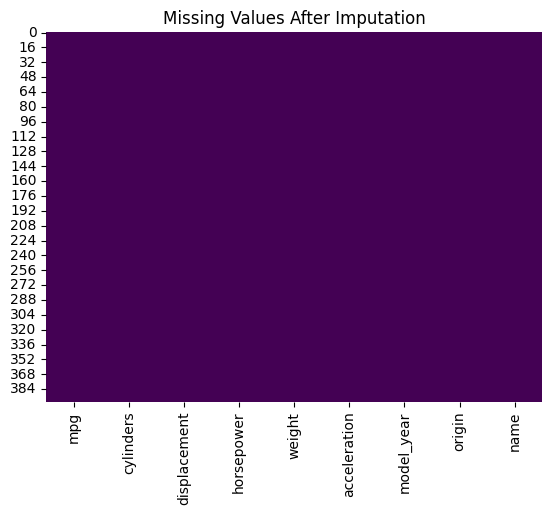

In [13]:
sns.heatmap(df_imputed.isnull(), cbar=False, cmap='viridis')
plt.title("Missing Values After Imputation")
plt.show()